In [ ]:
# ! pip install tensorflow
# ! pip install tensorflow-gpu

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [5]:
import warnings
warnings.filterwarnings('ignore')

##**Data Preparation**

In [6]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
train_images, test_images = X_train/255, X_test/255

170498071/170498071 [==============================] - 6s 0us/step


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

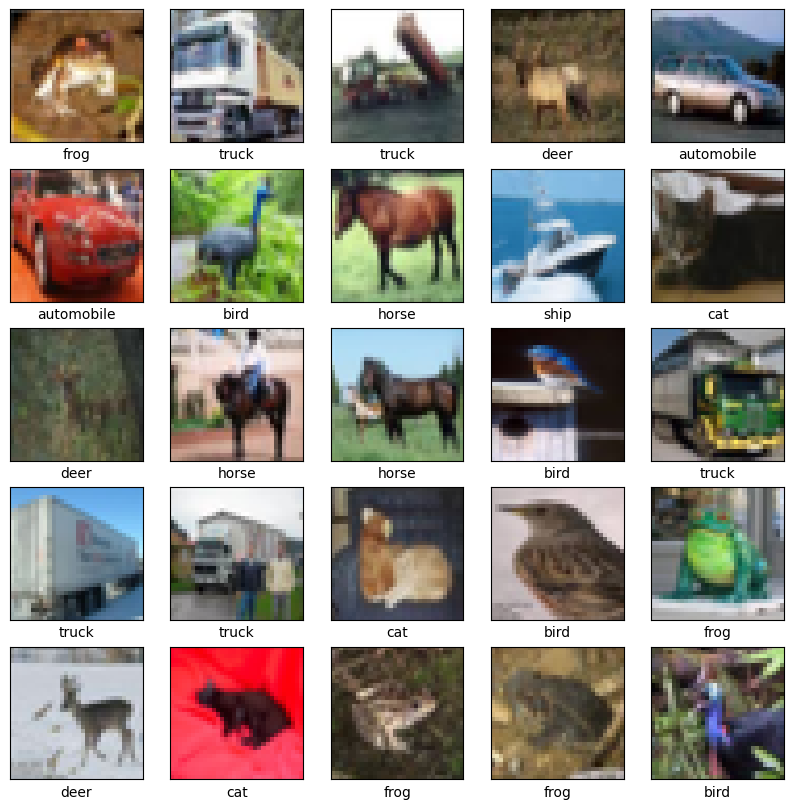

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

##**Train/Validation/Test Split**

In [9]:
test_images, valid_images, Y_test, Y_valid = train_test_split(test_images, Y_test, test_size=0.5, random_state=42)

##**CNN Model**

In [12]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

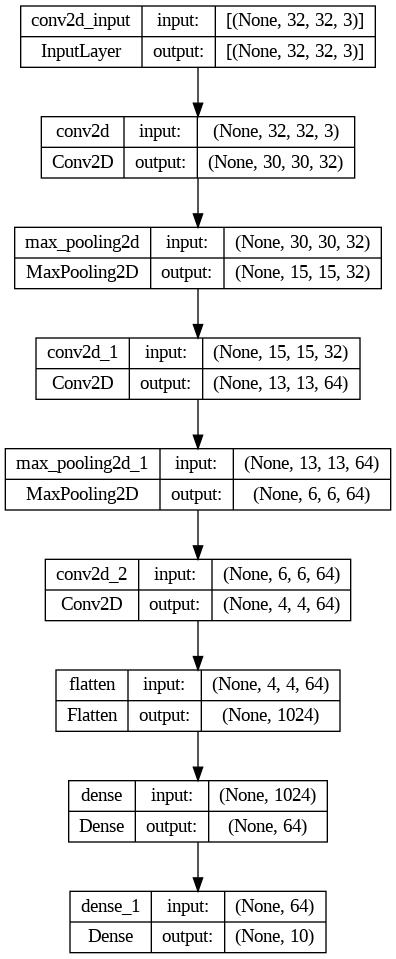

In [14]:
plot_model(cnn, show_shapes=True, show_layer_names=True)

##**CNN Training**

In [15]:
cnn.compile(optimizer='adam',
            loss=SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [16]:
history = cnn.fit(x=train_images, y=Y_train,
                  epochs=10,
                  batch_size=32,
                  validation_data=(valid_images, Y_valid))

Epoch 1/10
1563/1563 [==============================] - 21s 5ms/step - loss: 1.5102 - accuracy: 0.4496 - val_loss: 1.2558 - val_accuracy: 0.5572
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1463 - accuracy: 0.5973 - val_loss: 1.0926 - val_accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9940 - accuracy: 0.6532 - val_loss: 1.0127 - val_accuracy: 0.6536
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8964 - accuracy: 0.6868 - val_loss: 1.0163 - val_accuracy: 0.6466
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8212 - accuracy: 0.7136 - val_loss: 0.9608 - val_accuracy: 0.6712
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7655 - accuracy: 0.7310 - val_loss: 0.9095 - val_accuracy: 0.6860
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7137 - accuracy: 0.7487 - val_loss: 0.8890 - val_accuracy

##**Final Results**

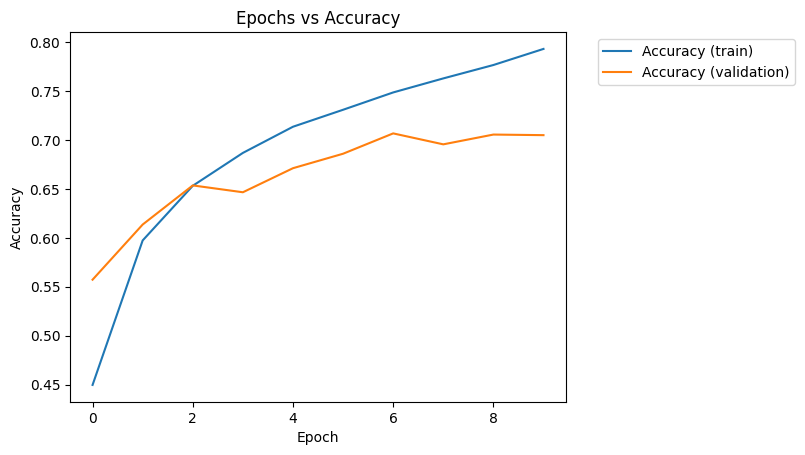

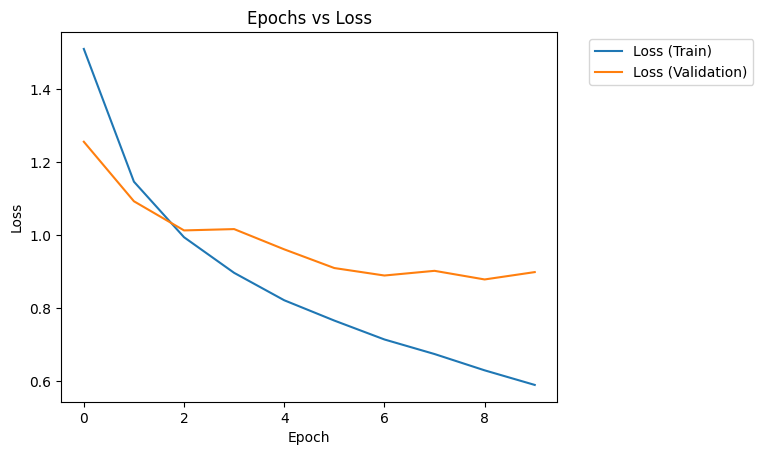

In [17]:
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label = 'Accuracy (validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label = 'Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [18]:
Y_pred_test = np.argmax(cnn.predict(test_images), axis=1)

157/157 [==============================] - 0s 2ms/step


In [19]:
test_acc = np.round(accuracy_score(Y_test, Y_pred_test)*100, 2)
print("Test Accuracy:", test_acc, "%")

Test Accuracy: 70.92 %


Confusion Matrix(Test)


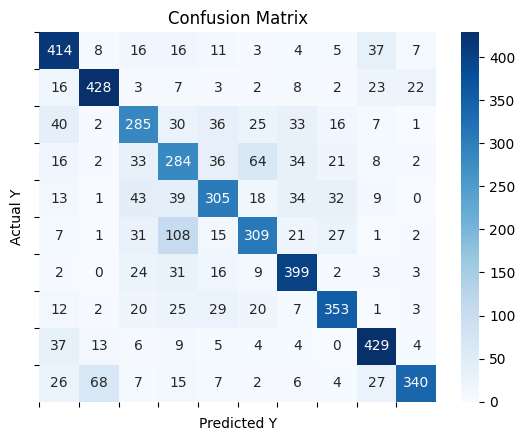

In [20]:
print('Confusion Matrix(Test)')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(10));
plt.yticks(np.arange(10));

plt.show()